# FINAL PROJECT PHASE II

## Research Question:

### Question: 

**Correlation between user experience and consumer willingness of purchasing products in different age groups;** 1) Is there a correlation between the user experience (helpful review, helpful recommendation, and frequency of receiving personalized product recommendations) and frequency of cart completion? 2) Is there a correlation between the user experience (helpful review, helpful recommendation, and frequency of receiving personalized product recommendations) and frequency of adding items to cart? 3) Patterns among the above two questions in different age groups.

In this project, we would like to investigate if there is a correlation between each x-variable (i.e. review helpfulness, recommendation helpfulness, frequency of receiving personalized product recommendations) and each y-variable (i.e. the frequency of adding items to cart and the frequency of cart completion). 

In addition, we would like to create a function with the three x-variables (review helpfulness, recommendation helpfulness, and frequency of receiving personalized product recommendations) that describes the user experience, and explore the correlation between user experience and the two y-variables (the frequency of adding items to cart and the frequency of cart completion) in different age groups. These include ***13-18, 19-25, 26-40, 41-64, and 65+***.

In [69]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression, \
LogisticRegression
import duckdb

## Data Overview:

**Data Source**

We found the dataset about behavioral analyses of Amazon customers on Kaggle, which aims to provide insights into customer preferences, shopping habits, and decision-making processes on the Amazon platform. The creator collected the data through a Google Form questionnaire and there were around six hundred customers who filled the survey out.

The creator included neutral, unbiased questions about browsing customer-related interaction variables like customer reviews and user interaction patterns and various variables related to their demographics.

**About the Data**

For example, the creator would ask questions such as “How often do you receive personalized product recommendations from Amazon?” The choices that the customers can select range from “Very Often” to “Rarely”.

The data includes questions that can provide valuable insights about consumer behavior through learning about customer preferences, shopping habits, and other decision-making factors as well as demographics. 

For example, it includes demographic variables such as age and gender, customer preferences such as product categories, and decision-making factors such as browsing frequency, customer reviews, and more.

**Data Content**

The dataset originally had factors such as age, gender, Purchase Frequency, Purchase Categories, Personalized Recommendation Frequency, Browsing_Frequency, Product_Search_Method, Search_Result_Exploration, Customer_Reviews_Importance, Add_to_Cart_Browsing, Cart_Completion_Frequency, Cart_Abandonment_Factors, Saveforlater_Frequency, Review_Left, Review_Reliability, Review_Helpfulness, Personalized_Recommendation_Frequency, Recommendation_Helpfulness, Rating_Accuracy, Shopping_Satisfaction, Service_Appreciation, and Improvement_Areas.

**Revelant Content**

We picked age, Review Helpfulness, Recommendation Helpfulness, Personalized Recommendation Frequency, Cart Completion Frequency, Add to Cart Browsing, and Customer Reviews Importance because we felt that factors such as Review Helpfulness, Recommendation Helpfulness, and Personalized Recommendation Frequency are more relevant to us in real life. These factors contribute to what most people value when making choices in wanting to purchase a product, which is demonstrated through Add to Cart Browsing, and Customer Reviews Importance. We mainly wanted to see if there was a pattern in how consumer behavioral factors can contribute to the decision-making process in buying the product generally and by age category. 


In [70]:
#import packages and read csv file
raw_df=pd.read_csv("/Users/ashleychiang/2950PROJECT/\
Amazon Customer Behavior Survey.csv",thousands=",")

print(raw_df.shape)
raw_df.head()

(602, 23)


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


## DATA CLEANING: 

Based on our research questions and our interests, we filtered out 7 variables/columns that are relevant toward our study, including age, review helpfulness, recommendation helpfulness, personalized recommendation frequency, cart completion frequency, add to cart browsing, and customer reviews importance. 

In [71]:
#we created a new dataframe called ini_df which includes 
#all the relevant variables to our research question.

ini_df= duckdb.sql('''

SELECT age, Review_Helpfulness, Recommendation_Helpfulness, 
Personalized_Recommendation_Frequency, Cart_Completion_Frequency, 
Add_to_Cart_Browsing, Customer_Reviews_Importance
FROM raw_df

''').df()

ini_df.head()

,age,Review_Helpfulness,Recommendation_Helpfulness,Personalized_Recommendation_Frequency,Cart_Completion_Frequency,Add_to_Cart_Browsing,Customer_Reviews_Importance
0,23,Yes,Yes,Yes,Sometimes,Yes,1
1,23,Yes,Sometimes,Yes,Often,Yes,1
2,24,No,No,No,Sometimes,Yes,2
3,24,Yes,Sometimes,Sometimes,Sometimes,Maybe,5
4,22,Yes,Yes,Yes,Sometimes,Yes,1


Since some of the columns are strings (i.e. Yes, Sometimes, No) and cannot be numerically measured, we change those strings to corresponding numbers (i.e. 0, 1, 2) with new columns, including columns such as review helpfulness, recommendation helpfulness, personalized recommendation frequency, cart completion frequency, add to cart browsing, and customer reviews importance. 

In [72]:
#We changed the values from string to numbers so 
#that we can actually measure the correlation. 


ini_df['New_Review_Helpfulness']=ini_df['Review_Helpfulness'].\
map({'No': 0, 'Sometimes': 1, 'Yes': 2})

ini_df['New_Recommendation_Helpfulness']=\
ini_df['Recommendation_Helpfulness'].\
map({'No': 0, 'Sometimes': 1, 'Yes': 2})

ini_df['New_Personalized_Recommendation_Frequency']=\
ini_df['Personalized_Recommendation_Frequency'].\
map({'No': 0, 'Sometimes': 1, 'Yes': 2})

ini_df['New_Cart_Completion_Frequency']=\
ini_df['Cart_Completion_Frequency'].\
map({'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often':3, 'Always':4})

ini_df['New_Add_to_Cart_Browsing']=ini_df['Add_to_Cart_Browsing'].\
map({'No': 0, 'Maybe': 1, 'Yes': 2})
ini_df.head()


,age,Review_Helpfulness,Recommendation_Helpfulness,Personalized_Recommendation_Frequency,Cart_Completion_Frequency,Add_to_Cart_Browsing,Customer_Reviews_Importance,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing
0,23,Yes,Yes,Yes,Sometimes,Yes,1,2,2,2,2,2
1,23,Yes,Sometimes,Yes,Often,Yes,1,2,1,2,3,2
2,24,No,No,No,Sometimes,Yes,2,0,0,0,2,2
3,24,Yes,Sometimes,Sometimes,Sometimes,Maybe,5,2,1,1,2,1
4,22,Yes,Yes,Yes,Sometimes,Yes,1,2,2,2,2,2


We created a new dataframe called num_df by selecting the new columns, age, and Customer_Reviews_Importance as we will not be using original columns with strings in our project.

In [73]:
#We filtered out the old columns that weren't relevant 
#anymore into a new dataframe as we have updated the columns. 


num_df=duckdb.sql('''
SELECT age, New_Review_Helpfulness, New_Recommendation_Helpfulness, 
New_Personalized_Recommendation_Frequency, New_Cart_Completion_Frequency, 
New_Add_to_Cart_Browsing, Customer_Reviews_Importance
FROM ini_df
'''                  
).df()
num_df.head()

,age,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing,Customer_Reviews_Importance
0,23,2,2,2,2,2,1
1,23,2,1,2,3,2,1
2,24,0,0,0,2,2,2
3,24,2,1,1,2,1,5
4,22,2,2,2,2,2,1


In case of outliers and oddities with age, we filtered out the ages that are below 13 since they are not allowed to have an Amazon account. 

In [74]:
#We looked for outliers for age. We know that if age is under 13, 
#they can't make accounts to buy things. 

cleaned_df=duckdb.sql('''
SELECT *
FROM num_df
WHERE age>=13
''').df()

print(cleaned_df.shape)

cleaned_df.head()

(600, 7)


,age,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing,Customer_Reviews_Importance
0,23,2,2,2,2,2,1
1,23,2,1,2,3,2,1
2,24,0,0,0,2,2,2
3,24,2,1,1,2,1,5
4,22,2,2,2,2,2,1


Since customer_reviews_importance reflects the significance of new_review_helpfulness, we combined both variables into one, which we weighted the new_reviews_helpfulness by customer_reviews_importance.

After this, we dropped the customer_reviews_importance as it is already taken into account with our updated column.

In [75]:
# We weighted the new_review_helpfulness with 
#customer_reviews_importance

cleaned_df['New_Review_Helpfulness'] = \
cleaned_df['New_Review_Helpfulness']*\
cleaned_df['Customer_Reviews_Importance']

# We dropped the customer_reviews_importance

cleaned_df = duckdb.sql('''
SELECT age, New_Review_Helpfulness, New_Recommendation_Helpfulness, 
New_Personalized_Recommendation_Frequency, New_Cart_Completion_Frequency, 
New_Add_to_Cart_Browsing
FROM cleaned_df
''').df()

cleaned_df.head()

,age,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing
0,23,2,2,2,2,2
1,23,2,1,2,3,2
2,24,0,0,0,2,2
3,24,10,1,1,2,1
4,22,2,2,2,2,2


We created a new dataframe called x_y_df, which includes x variable (i.e. User_Experience) and y variables(i.e. New_Cart_Completion_Frequency, New_Add_to_Cart_Browsing).

In [76]:
# x_y dataset, where we want to save a copy of the age column.
x_y_df = duckdb.sql('''
SELECT age, New_Cart_Completion_Frequency, New_Add_to_Cart_Browsing
FROM cleaned_df
''').df()

x_y_df.head()

#We want to categorize into 5 different age groups with the cleaned_df.

cleaned_df.loc[(cleaned_df["age"] >= 13) & (cleaned_df["age"] <= 18)\
               , "age_group"] = 1
cleaned_df.loc[(cleaned_df["age"] >= 19) & (cleaned_df["age"] <= 25)\
               , "age_group"] = 2
cleaned_df.loc[(cleaned_df["age"] >= 26) & (cleaned_df["age"] <= 40)\
               , "age_group"] = 3
cleaned_df.loc[(cleaned_df["age"] >= 41) & (cleaned_df["age"] <= 64)\
               , "age_group"] = 4
cleaned_df.loc[(cleaned_df["age"] >= 65), "age_group"] = 5

#We changed the type of age_group column from float to int. 
cleaned_df["age_group"] = cleaned_df["age_group"].astype(int)

final_df = cleaned_df

final_df.head()

,age,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,New_Add_to_Cart_Browsing,age_group
0,23,2,2,2,2,2,2
1,23,2,1,2,3,2,2
2,24,0,0,0,2,2,2
3,24,10,1,1,2,1,2
4,22,2,2,2,2,2,2


## Explorative Analysis:

We explored the correlation between each x-variables and y-variables by plotting linear and scatterplot and finding the gradient with linear regression. 

### 1. x-variables and New_Add_to_Cart_Browsing (y1)

We explored the correlation between New_Review_Helpfulness and New_Add_to_Cart_Browsing by ploting linear-scatterplot and find out the coefficient of the two variables. 

**NOTES:**  y-axis - 0: No, 1: Maybe, 2: Yes

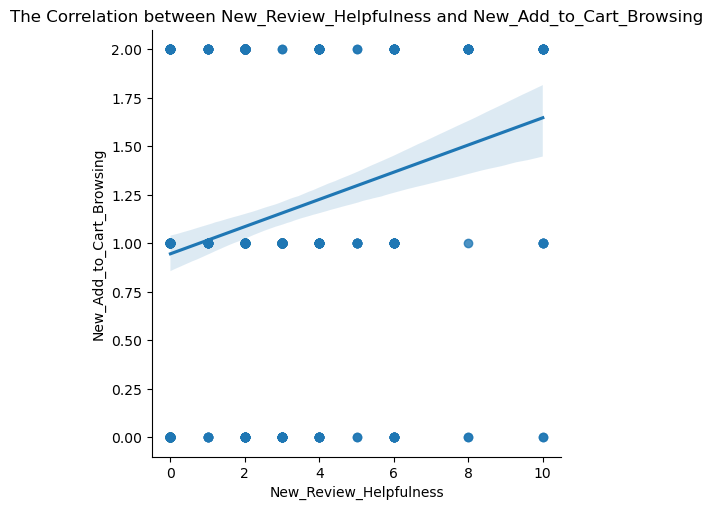

The gradient of New_Review_Helpfulness and New_Add_to_Cart_Browsing is 0.07


In [77]:
# plot x1 and y1
plot_1_1=sns.lmplot(data = final_df, x='New_Review_Helpfulness', \
                    y='New_Add_to_Cart_Browsing')
plt.title('The Correlation between New_Review_Helpfulness \
and New_Add_to_Cart_Browsing')
plt.show()

# find the gradient of the linear regression model of x1 and y1
X=final_df['New_Review_Helpfulness'].values.reshape(-1,1)
y=final_df['New_Add_to_Cart_Browsing'].values
model_1_1 = LinearRegression().fit(X, y)
g_1_1 = model_1_1.coef_[0].round(3)
print("The gradient of New_Review_Helpfulness and \
New_Add_to_Cart_Browsing is " + str(g_1_1))

We explored the correlation between New_Recommendation_Helpfulness and New_Add_to_Cart_Browsing by ploting linear-scatterplot and find out the coefficient of the two variables.

**NOTES:**  y-axis - 0: No, 1: Maybe, 2: Yes

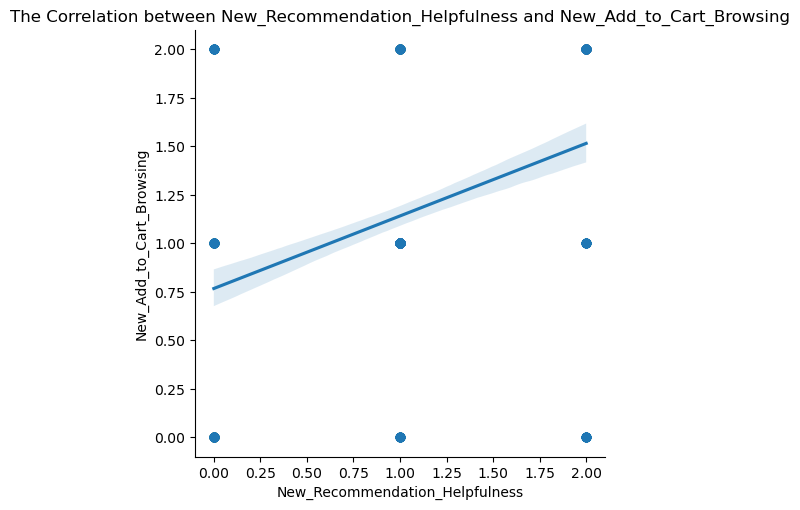

The gradient of New_Recommendation_Helpfulness and New_Add_to_Cart_Browsing is 0.374


In [78]:
# plot x2 and y1
plot_1_2=sns.lmplot(data = final_df, x='New_Recommendation_Helpfulness', \
                    y='New_Add_to_Cart_Browsing')
plt.title('The Correlation between New_Recommendation_Helpfulness \
and New_Add_to_Cart_Browsing')
plt.show()

# find the gradient of the linear regression model of x2 and y1
X=final_df['New_Recommendation_Helpfulness'].values.reshape(-1,1)
y=final_df['New_Add_to_Cart_Browsing'].values
model_1_2 = LinearRegression().fit(X, y)
g_1_2 = model_1_2.coef_[0].round(3)
print("The gradient of New_Recommendation_Helpfulness and \
New_Add_to_Cart_Browsing is " + str(g_1_2))

We explored the correlation between New_Personalized_Recommendation_Frequency and New_Add_to_Cart_Browsing by ploting linear-scatterplot and find out the coefficient of the two variables.

**NOTES:**  y-axis - 0: No, 1: Maybe, 2: Yes

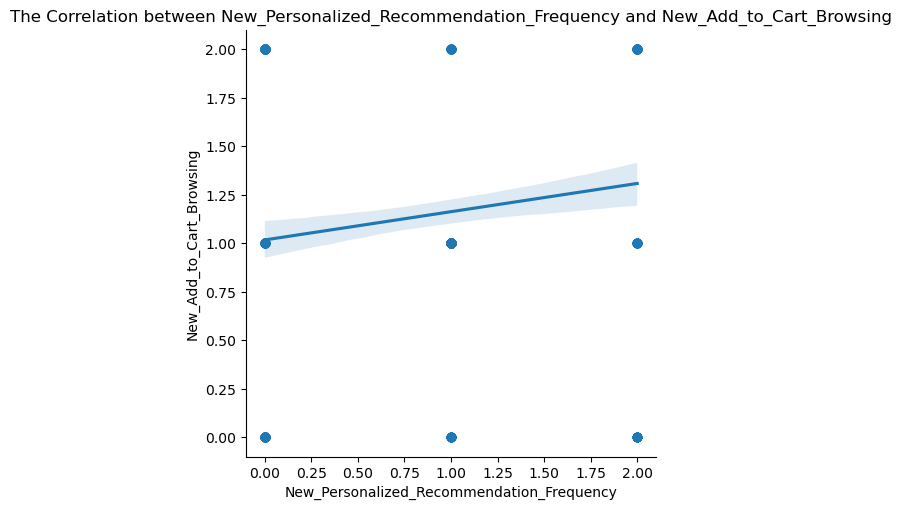

The gradient of New_Personalized_Recommendation_Frequency and New_Add_to_Cart_Browsing is 0.146


In [79]:
# plot x3 and y1
plot_1_3=sns.lmplot(data = final_df, \
                    x='New_Personalized_Recommendation_Frequency', \
                    y='New_Add_to_Cart_Browsing')
plt.title('The Correlation between \
New_Personalized_Recommendation_Frequency and \
New_Add_to_Cart_Browsing')
plt.show()

# find the gradient of the linear regression model of x3 and y1
X=final_df['New_Personalized_Recommendation_Frequency']\
.values.reshape(-1,1)
y=final_df['New_Add_to_Cart_Browsing'].values
model_1_3 = LinearRegression().fit(X, y)
g_1_3 = model_1_3.coef_[0].round(3)
print( "The gradient of New_Personalized_Recommendation_Frequency and \
New_Add_to_Cart_Browsing is " + str(g_1_3))

Through plotting different graphs of the 3 x-variables and y-variable, New Add to Cart Browsing, we explored the correlation of each factor that influence purchasing behavior. We found out there are different gradients of each x factor and New Add to Cart Browsing, which indicates that each factor has a different amount of influence on the New Add to Cart Browsing. As a result, we wanted to plot the multivariable regression based on the gradients.

In [80]:
# create a new dataset for the multivariable regression 
#(New Add to Cart Browsing)

multi_1_df = duckdb.sql('''
SELECT age, age_group, New_Review_Helpfulness, 
New_Recommendation_Helpfulness, 
New_Personalized_Recommendation_Frequency,
New_Add_to_Cart_Browsing
FROM final_df
''').df()

# we weighted the three x-variables by their respective gradients

multi_1_df['New_Review_Helpfulness'] = \
multi_1_df['New_Review_Helpfulness'] * g_1_1
multi_1_df['New_Recommendation_Helpfulness'] = \
multi_1_df['New_Recommendation_Helpfulness'] * g_1_2
multi_1_df['New_Personalized_Recommendation_Frequency'] = \
multi_1_df['New_Personalized_Recommendation_Frequency'] * g_1_3

# create a new column called 'User_experience'

multi_1_df['User_experience'] = multi_1_df['New_Review_Helpfulness'] \
+ multi_1_df['New_Recommendation_Helpfulness']\
+ multi_1_df['New_Personalized_Recommendation_Frequency']

multi_1_df.head()

,age,age_group,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Add_to_Cart_Browsing,User_experience
0,23,2,0.14,0.748,0.292,2,1.180
1,23,2,0.14,0.374,0.292,2,0.806
2,24,2,0.00,0.000,0.000,2,0.000
3,24,2,0.70,0.374,0.146,1,1.220
4,22,2,0.14,0.748,0.292,2,1.180


We explored the correlation between **User_experience (= g_1_1 * x1 + g_1_2 * x2 + g_1_3 * x3)** and New_Add_to_Cart_Browsing by ploting linear-scatterplot and find out the coefficient of the two variables.

**NOTES:**  y-axis - 0: No, 1: Maybe, 2: Yes

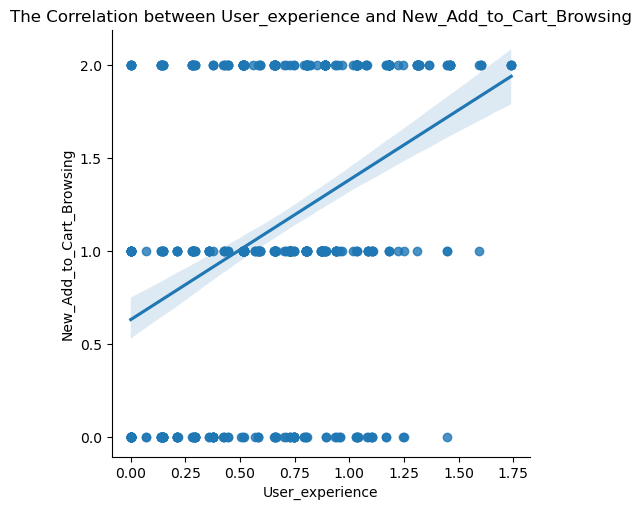

The gradient of User_experience and New_Add_to_Cart_Browsing is 0.751


In [81]:
# plot User_experience and y1
plot_1_4=sns.lmplot(data = multi_1_df, x='User_experience', \
                    y='New_Add_to_Cart_Browsing')
plt.title('The Correlation between User_experience and \
New_Add_to_Cart_Browsing')
plt.show()

# find the gradient of the 
#multi-variable linear regression model of User_experience and y1
X=multi_1_df['User_experience'].values.reshape(-1,1)
y=multi_1_df['New_Add_to_Cart_Browsing'].values
model_1_4 = LinearRegression().fit(X, y)
g_1_4 = model_1_4.coef_[0].round(3)
print("The gradient of User_experience and \
New_Add_to_Cart_Browsing is " + str(g_1_4))

### 2. x-variables and New_Cart_Completion_Frequency (y2)

We explored the correlation between New_Review_Helpfulness and New_Cart_Completion_Frequency by ploting linear-scatterplot and find out the coefficient of the two variables.

**NOTES:**  y-axis - 0: Never, 1: Rarely, 2: Sometimes, 3: Often, 4: Always

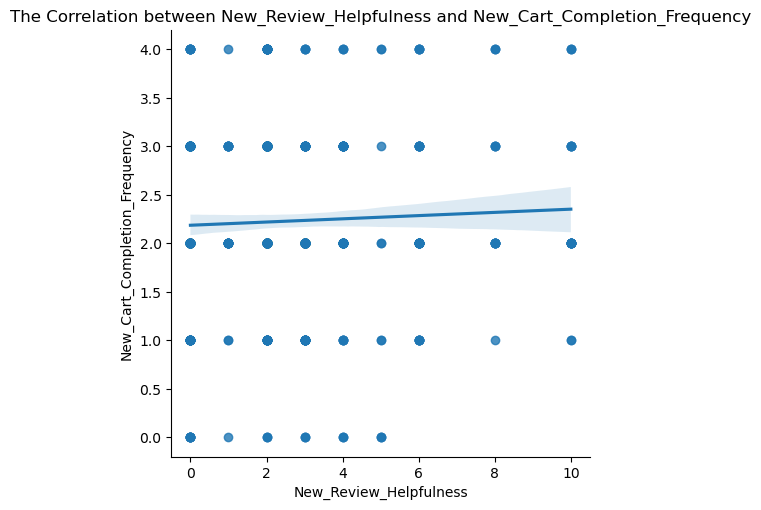

The gradient of New_Review_Helpfulness and New_Cart_Completion_Frequency is 0.017


In [82]:
# plot x1 and y2
plot_2_1=sns.lmplot(data = final_df, x='New_Review_Helpfulness', \
                    y='New_Cart_Completion_Frequency')
plt.title('The Correlation between New_Review_Helpfulness \
and New_Cart_Completion_Frequency')
plt.show()

# find the gradient of the linear regression model x1 and y2
X=final_df['New_Review_Helpfulness'].values.reshape(-1,1)
y=final_df['New_Cart_Completion_Frequency'].values
model_2_1 = LinearRegression().fit(X, y)
g_2_1 = model_2_1.coef_[0].round(3)
print("The gradient of New_Review_Helpfulness and \
New_Cart_Completion_Frequency is " + str(g_2_1))

We explored the correlation between New_Recommendation_Helpfulness and New_Cart_Completion_Frequency by ploting linear-scatterplot and find out the coefficient of the two variables.

**NOTES:**  y-axis - 0: Never, 1: Rarely, 2: Sometimes, 3: Often, 4: Always

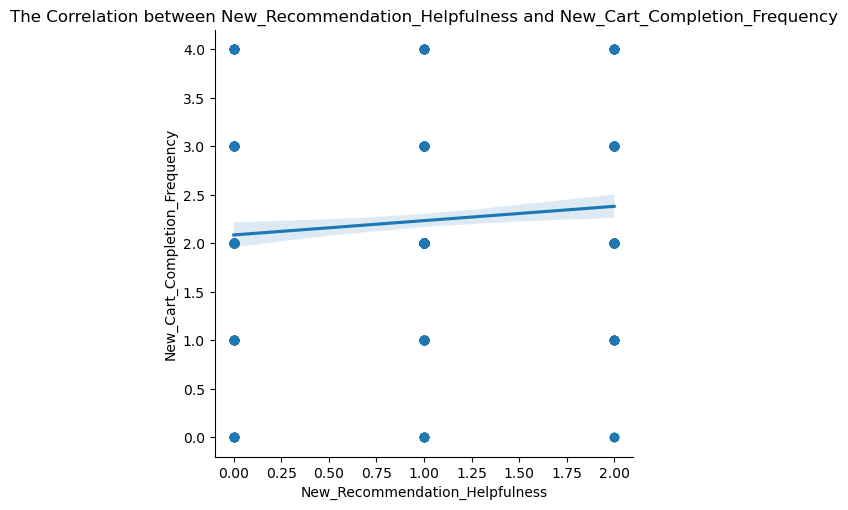

The gradient of New_Recommendation_Helpfulness and New_Cart_Completion_Frequency is 0.147


In [83]:
# plot x2 and y2
plot_2_2=sns.lmplot(data = final_df, x='New_Recommendation_Helpfulness', \
                    y='New_Cart_Completion_Frequency')
plt.title('The Correlation between New_Recommendation_Helpfulness \
and New_Cart_Completion_Frequency')
plt.show()

# find the gradient of the linear regression model x2 and y2
X=final_df['New_Recommendation_Helpfulness'].values.reshape(-1,1)
y=final_df['New_Cart_Completion_Frequency'].values
model_2_2 = LinearRegression().fit(X, y)
g_2_2 = model_2_2.coef_[0].round(3)
print("The gradient of New_Recommendation_Helpfulness and \
New_Cart_Completion_Frequency is " + str(g_2_2))

We explored the correlation between New_Personalized_Recommendation_Frequency and New_Cart_Completion_Frequency by ploting linear-scatterplot and find out the coefficient of the two variables.

**NOTES:**  y-axis - 0: Never, 1: Rarely, 2: Sometimes, 3: Often, 4: Always

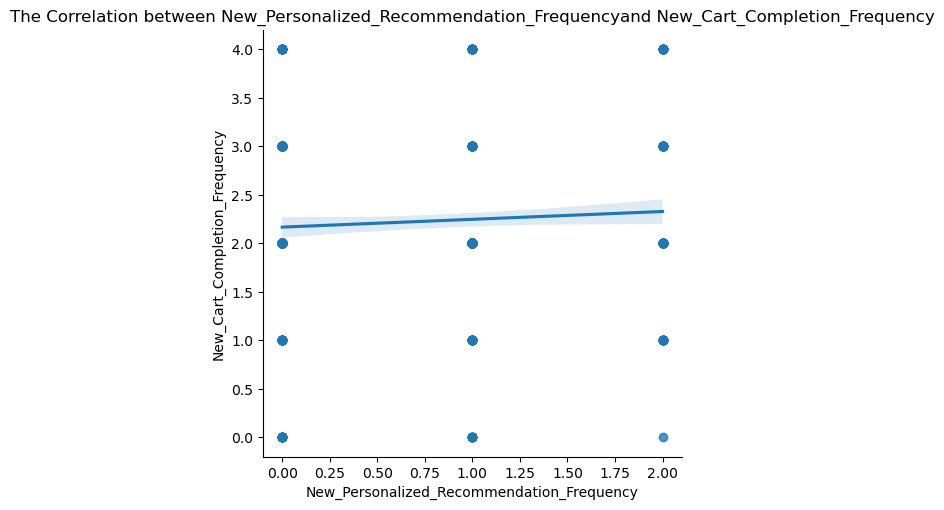

The gradient of New_Personalized_Recommendation_Frequency and New_Cart_Completion_Frequency is 0.081


In [84]:
# plot x3 and y2
plot_2_3=sns.lmplot(data = final_df, \
                    x='New_Personalized_Recommendation_Frequency', \
                    y='New_Cart_Completion_Frequency')
plt.title('The Correlation between New_Personalized_Recommendation_Frequency\
and New_Cart_Completion_Frequency')
plt.show()

# find the gradient of the linear regression model x3 and y2
X=final_df['New_Personalized_Recommendation_Frequency']\
.values.reshape(-1,1)
y=final_df['New_Cart_Completion_Frequency'].values
model_2_3 = LinearRegression().fit(X, y)
g_2_3 = model_2_3.coef_[0].round(3)
print("The gradient of New_Personalized_Recommendation_Frequency and \
New_Cart_Completion_Frequency is " + str(g_2_3))

Similarly to New_Add_to_Cart Browsing, we found out there are different gradients between each x factor and New_Cart_Completion_Frequency, which indicates that each factor has a different amount of influence on the New_Cart_Completion_Frequency. As a result, we wanted to plot the multivariable linear regression based on the gradients.

In [85]:
# create a new dataset for the multivariable regression 
#(New_Cart_Completion_Frequency)

multi_2_df = duckdb.sql('''
SELECT age, age_group, New_Review_Helpfulness, 
New_Recommendation_Helpfulness, 
New_Personalized_Recommendation_Frequency,
New_Cart_Completion_Frequency
FROM final_df
''').df()

# we weighted the three x-variables by their respective gradients

multi_2_df['New_Review_Helpfulness'] = \
multi_2_df['New_Review_Helpfulness'] * g_2_1
multi_2_df['New_Recommendation_Helpfulness'] = \
multi_2_df['New_Recommendation_Helpfulness'] * g_2_2
multi_2_df['New_Personalized_Recommendation_Frequency'] = \
multi_2_df['New_Personalized_Recommendation_Frequency'] * g_2_3

# create a new column called 'User_experience'

multi_2_df['User_experience'] = multi_2_df['New_Review_Helpfulness'] \
+ multi_1_df['New_Recommendation_Helpfulness'] \
+ multi_1_df['New_Personalized_Recommendation_Frequency']

multi_2_df.head()

,age,age_group,New_Review_Helpfulness,New_Recommendation_Helpfulness,New_Personalized_Recommendation_Frequency,New_Cart_Completion_Frequency,User_experience
0,23,2,0.034,0.294,0.162,2,1.074
1,23,2,0.034,0.147,0.162,3,0.700
2,24,2,0.000,0.000,0.000,2,0.000
3,24,2,0.170,0.147,0.081,2,0.690
4,22,2,0.034,0.294,0.162,2,1.074


We explored the correlation between **User_experience (= g_2_1 * x1 + g_2_2 * x2 + g_2_3 * x3)** and New_Cart_Completion_Frequency by ploting linear-scatterplot and find out the coefficient of the two variables.

**NOTES:**  y-axis - 0: Never, 1: Rarely, 2: Sometimes, 3: Often, 4: Always

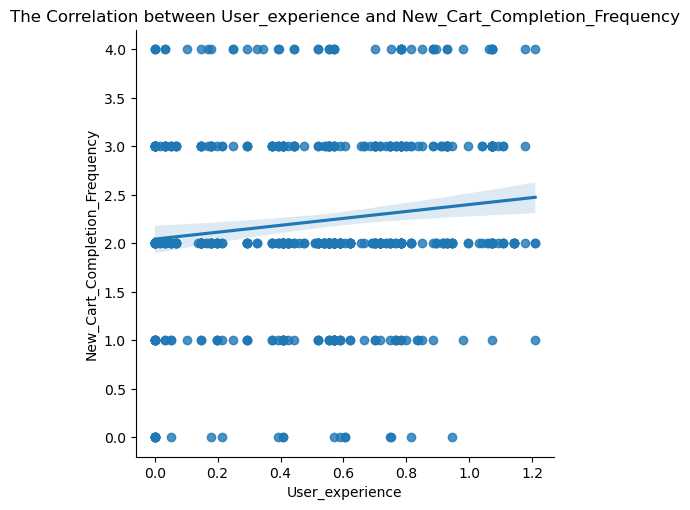

The gradient of User_experience and New_Cart_Completion_Frequency is 0.357


In [86]:
# User_experience and y2
plot_2_4=sns.lmplot(data = multi_2_df, x='User_experience', \
                    y='New_Cart_Completion_Frequency')
plt.title('The Correlation between User_experience and \
New_Cart_Completion_Frequency')
plt.show()

# stats of User_experience and y2
X=multi_2_df['User_experience'].values.reshape(-1,1)
y=multi_2_df['New_Cart_Completion_Frequency'].values
model_2_4 = LinearRegression().fit(X, y)
g_2_4 = model_2_4.coef_[0].round(3)
print("The gradient of User_experience and \
New_Cart_Completion_Frequency is " + str(g_2_4))

### 3. User_experience and New_Add_to_Cart_Browsing in different age groups

We explore the multi-variable regression of user_experience and New_Add_to_Cart_Browsing in different age groups (***1: 13-18, 2: 19-25, 3: 26-40, 4: 41-64, and 5: 65+***)

**NOTES:**  y-axis - 0: No, 1: Maybe, 2: Yes

/Users/ashleychiang/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ashleychiang/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


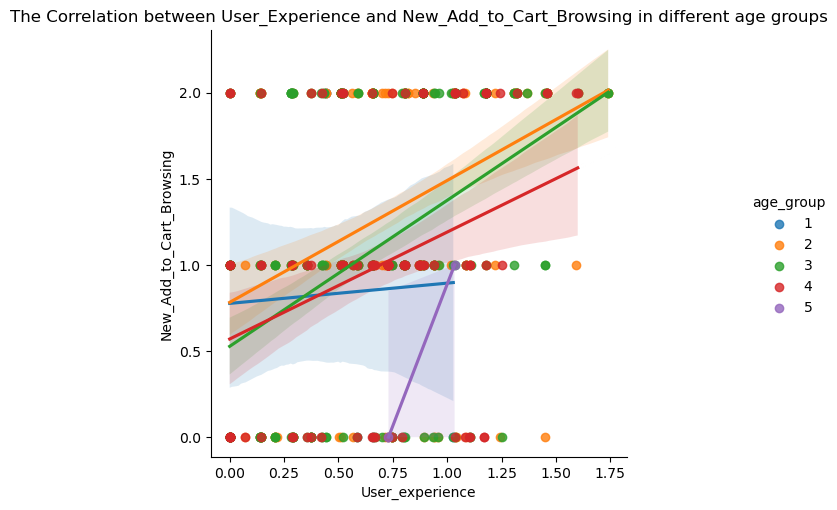

In [87]:
# plot User_experience and New_Add_to_Cart_Browsing
plot_age_1 = sns.lmplot(data = multi_1_df, x='User_experience', \
                        y='New_Add_to_Cart_Browsing', hue='age_group')
plt.title('The Correlation between User_Experience and \
New_Add_to_Cart_Browsing in different age groups')
plt.show()


### 4. User_experience and New_Cart_Completion_Frequency in different age groups

We explore the multi-variable regression of user_experience and New_Cart_Completion_Frequency in different age groups (***1: 13-18, 2: 19-25, 3: 26-40, 4: 41-64, and 5: 65+***)

**NOTES:**  y-axis - 0: Never, 1: Rarely, 2: Sometimes, 3: Often, 4: Always

/Users/ashleychiang/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ashleychiang/anaconda3/envs/info2950/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


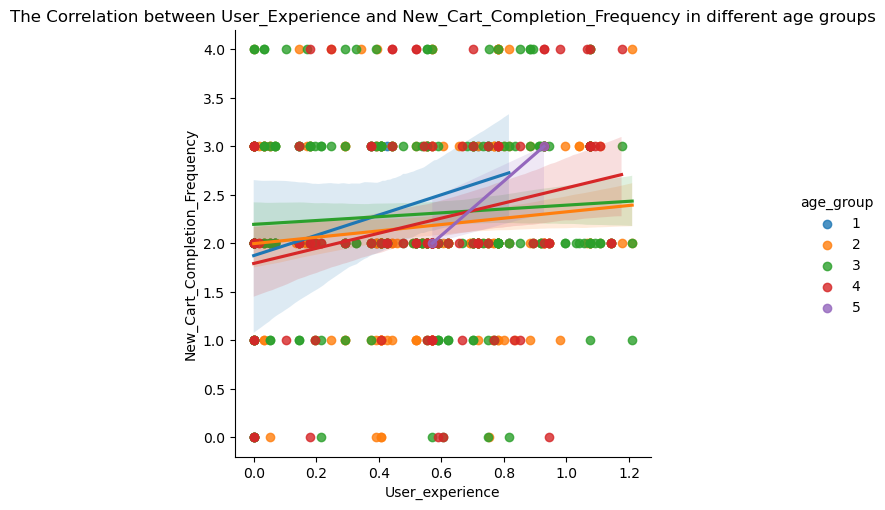

In [88]:
# plot User_experience and New_Cart_Completion_Frequency
plot_age_2 = sns.lmplot(data = multi_2_df, x='User_experience', \
                        y='New_Cart_Completion_Frequency', hue='age_group')
plt.title('The Correlation between User_Experience \
and New_Cart_Completion_Frequency in different age groups')
plt.show()

## Data Description:

### Motivation

This dataset was created because the creator was interested in what factors can contribute to overall customer preference, behavior, and satisfaction with Amazon’s services. This dataset can help with finding patterns in helping the business with improving user experience and purchasing behaviors. Through this, they can be able to see a correlation of what impacts the consumer behavior and look for patterns to help improve user experience.
Swathi Menon from Kaggle created a google form questionnaire and asked Amazon users to fill out this form. It is unclear what platform they shared their form to unfortunately, which is one of the limitations of the dataset. 

### Credits and values of Data source 
Swathi has some expertise in analyzing datasets and creating regressions models, as they have done in their internship at Luminar Technolab. They have created multiple notebooks on Kaggle as a Notebook expert at Kaggle.

### Data collection and Data processing 

It does not explicitly say that the people who completed the survey were aware that their data was collected and publicized. Surveys are usually for data collection, but it doesn’t say if they were aware that this is publicized. Despite this, they can expect the data to be collected to form some analysis of some point. 

Processes that might have influenced the data was where the creator shared their questionnaire. Some people might not use certain platforms and that might have caused a biased result. Furthermore, this questionnaire was online so we felt like some people who might not use technology won’t use it. Since it is a questionnaire, it is optional and voluntary. People with stronger opinions are more oriented to fill this survey out, so the data might be biased. 

### Observations and Attributes (rows and columns)

* 1.age= age 
* 2.gender= gender 
* 3.Purchase_Frequency= How frequently do you make purchases on Amazon? 
* 4.Purchase_Categories= What product categories do you typically purchase on Amazon? 
* 5.Personalized_Recommendation_Frequency = Have you ever made a purchase based on personalized product recommendations from Amazon? 
* 6.Browsing_Frequency =How often do you browse Amazon's website or app? 
* 7.Product_Search_Method =How do you search for products on Amazon? 
* 8.Search_Result_Exploration =Do you tend to explore multiple pages of search results or focus on the first page? 
* 9.Customer_Reviews_Importance =How important are customer reviews in your decision-making process? 
* 10.Add_to_Cart_Browsing =Do you add products to your cart while browsing on Amazon? 
* 11.Cart_Completion_Frequency =How often do you complete the purchase after adding products to your cart? 
* 12.Cart_Abandonment_Factors =What factors influence your decision to abandon a purchase in your cart? 
* 13.Saveforlater_Frequency =Do you use Amazon's "Save for Later" feature, and if so, how often? 
* 14.Review_Left =Have you ever left a product review on Amazon? 
* 15.Review_Reliability =How much do you rely on product reviews when making a purchase? 
* 16.Review_Helpfulness =Do you find helpful information from other customers' reviews? 
* 17.Personalized_Recommendation_Frequency =How often do you receive personalized product recommendations from Amazon? 
* 18.Recommendation_Helpfulness =Do you find the recommendations helpful? 
* 19.Rating_Accuracy =How would you rate the relevance and accuracy of the recommendations you receive 
* 20.Shopping_Satisfaction =How satisfied are you with your overall shopping experience on Amazon? 
* 21.Service_Appreciation =What aspects of Amazon's services do you appreciate the most? 
* 22.Improvement_Areas =Are there any areas where you think Amazon can improve?

There is no exact raw data, as the creator did not web scrape anything. The creator created this raw dataset from google form responses. The original dataset can be found in the follwoing link: https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset/data


## Data Limitation:

Since the data is collected from a Google form survey, there are several limitations of survey research in the dataset:

**1. Limited sample size**

There are over 300 million active users on Amazon, yet the dataset only represents the thought’s of 600 samples into account which might not be enough to represent the majority of users’ behavior. Hence, the data would still lead to a conclusion on our research question but the results might not be statistically significant. 

**2. Limited scale of measurement**

In the dataset we used, the type of values in some columns is string, including Review_Helpfulness, Recommendation_Helpfulness, Personalized_Recommendation_Frequency, Add_to_Cart_Browsing, and Cart_Completion_Frequency. For example, there are Yes, Sometimes, and No in Review_Helpfulness, and there are Never, Rarely, Sometimes, Often, and Always in Cart_Completion_Frequency. However, the number of options provided to the customers are limited. Thus, the option being picked might not fully represent customers’ opinions since some of the customers might have been struggling between two options.

**3. Unknown Data Collection Method**

The creator of the Google form did not specify the data collection method. We are uncertain how the creator shared this platform. Depending on which types of platform, this might attract different demographics of users. For example, sending the questionnaire on Instagram vs. Reddit has different types of audience, which may influence our data analysis findings. Hence, the data might be biased which cannot be representative of the majority of Amazon users.


## Questions for Reviewer:

* What do you think is the best model (i.e.scatterplot vs linear plot) for our findings? 
* Do you have any suggestion in analyzing our plot results since it contains scatterplots but also linears? 
